In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from math import sqrt
from sklearn.metrics import r2_score
from pickle import dump
from sklearn.ensemble import RandomForestRegressor

In [2]:
xls = "../acma_acmanet/src/Acma_21_22_23.xlsx"
df = pd.read_excel(xls, sheet_name="DB")

In [3]:
df.columns

Index(['f_despreal', 'clent', 'nombredelsolicitante', 'matriccamion',
       'nidentfis1', 'destino', 'pesototal', 'transporte', 'rampla', 'ciudad',
       'region', 'radio', 'base', 'servicio', 'total', 'pesoskg', 'kgmin',
       'ocupacion', 'guías', 'Mes', 'Año', 'Region'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9002 entries, 0 to 9001
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   f_despreal            7787 non-null   object 
 1   clent                 7787 non-null   object 
 2   nombredelsolicitante  7787 non-null   object 
 3   matriccamion          7787 non-null   object 
 4   nidentfis1            7787 non-null   object 
 5   destino               7787 non-null   object 
 6   pesototal             7787 non-null   float64
 7   transporte            7787 non-null   object 
 8   rampla                7787 non-null   float64
 9   ciudad                7787 non-null   object 
 10  region                7787 non-null   object 
 11  radio                 7787 non-null   float64
 12  base                  7782 non-null   float64
 13  servicio              7782 non-null   float64
 14  total                 7787 non-null   float64
 15  pesoskg              

In [5]:
valores_unicos = df['region'].unique()
# Imprimir los valores únicos
print("Valores únicos de la columna 'region':")
for valor in valores_unicos:
    print(valor)

Valores únicos de la columna 'region':
DEL BIOBIO
METROPOLITANA DE SANTIAGO
DE VALPARAISO
DEL MAULE
DE LA ARAUCANIA
DE ÑUBLE
DEL LIBERTADOR GENERAL BERNARDO O'HIGGINS
DE ANTOFAGASTA
DE COQUIMBO
DE ATACAMA
DE LOS LAGOS
DE LOS RIOS
DE PAINE
DE ARICA Y PARINACOTA
nan


In [6]:
#onehotencoding
regiones = df[["region"]]
regiones = pd.get_dummies(df["region"], drop_first=False)
regiones = regiones.applymap(lambda x : 1 if x ==1 else 0)

In [7]:
regiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9002 entries, 0 to 9001
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   DE ANTOFAGASTA                             9002 non-null   int64
 1   DE ARICA Y PARINACOTA                      9002 non-null   int64
 2   DE ATACAMA                                 9002 non-null   int64
 3   DE COQUIMBO                                9002 non-null   int64
 4   DE LA ARAUCANIA                            9002 non-null   int64
 5   DE LOS LAGOS                               9002 non-null   int64
 6   DE LOS RIOS                                9002 non-null   int64
 7   DE PAINE                                   9002 non-null   int64
 8   DE VALPARAISO                              9002 non-null   int64
 9   DE ÑUBLE                                   9002 non-null   int64
 10  DEL BIOBIO                                 9002 

In [8]:
#limpiando el df
columnas_delete = ['f_despreal', 'clent', 'nombredelsolicitante', 'matriccamion',
       'nidentfis1', 'destino', 'transporte', 'rampla', 'ciudad',
       'region', 'radio', 'base', 'servicio', 'kgmin',
       'ocupacion', 'guías', 'Mes', 'Año', 'Region', 'pesoskg' ]
df_clean = df.drop(columns=[col for col in columnas_delete if col in df.columns])

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9002 entries, 0 to 9001
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pesototal  7787 non-null   float64
 1   total      7787 non-null   float64
dtypes: float64(2)
memory usage: 140.8 KB


In [29]:
# Reorganizar las columnas
df_clean = df_clean[['total', 'pesototal']]

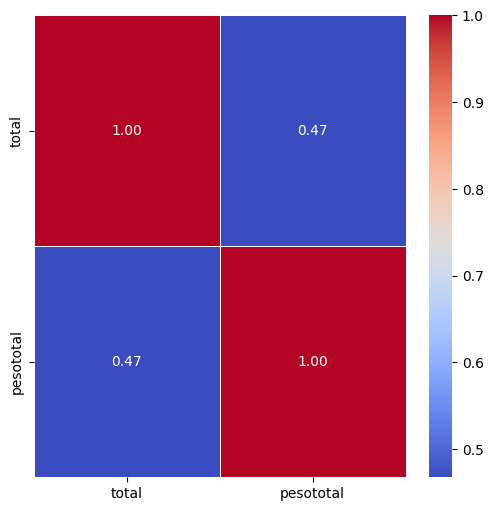

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

In [31]:
df_pxk = pd.concat([df_clean, regiones], axis=1)
df_pxk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9002 entries, 0 to 9001
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   total                                      7787 non-null   float64
 1   pesototal                                  7787 non-null   float64
 2   DE ANTOFAGASTA                             9002 non-null   int64  
 3   DE ARICA Y PARINACOTA                      9002 non-null   int64  
 4   DE ATACAMA                                 9002 non-null   int64  
 5   DE COQUIMBO                                9002 non-null   int64  
 6   DE LA ARAUCANIA                            9002 non-null   int64  
 7   DE LOS LAGOS                               9002 non-null   int64  
 8   DE LOS RIOS                                9002 non-null   int64  
 9   DE PAINE                                   9002 non-null   int64  
 10  DE VALPARAISO           

In [32]:
df_pxk = df_pxk.dropna()

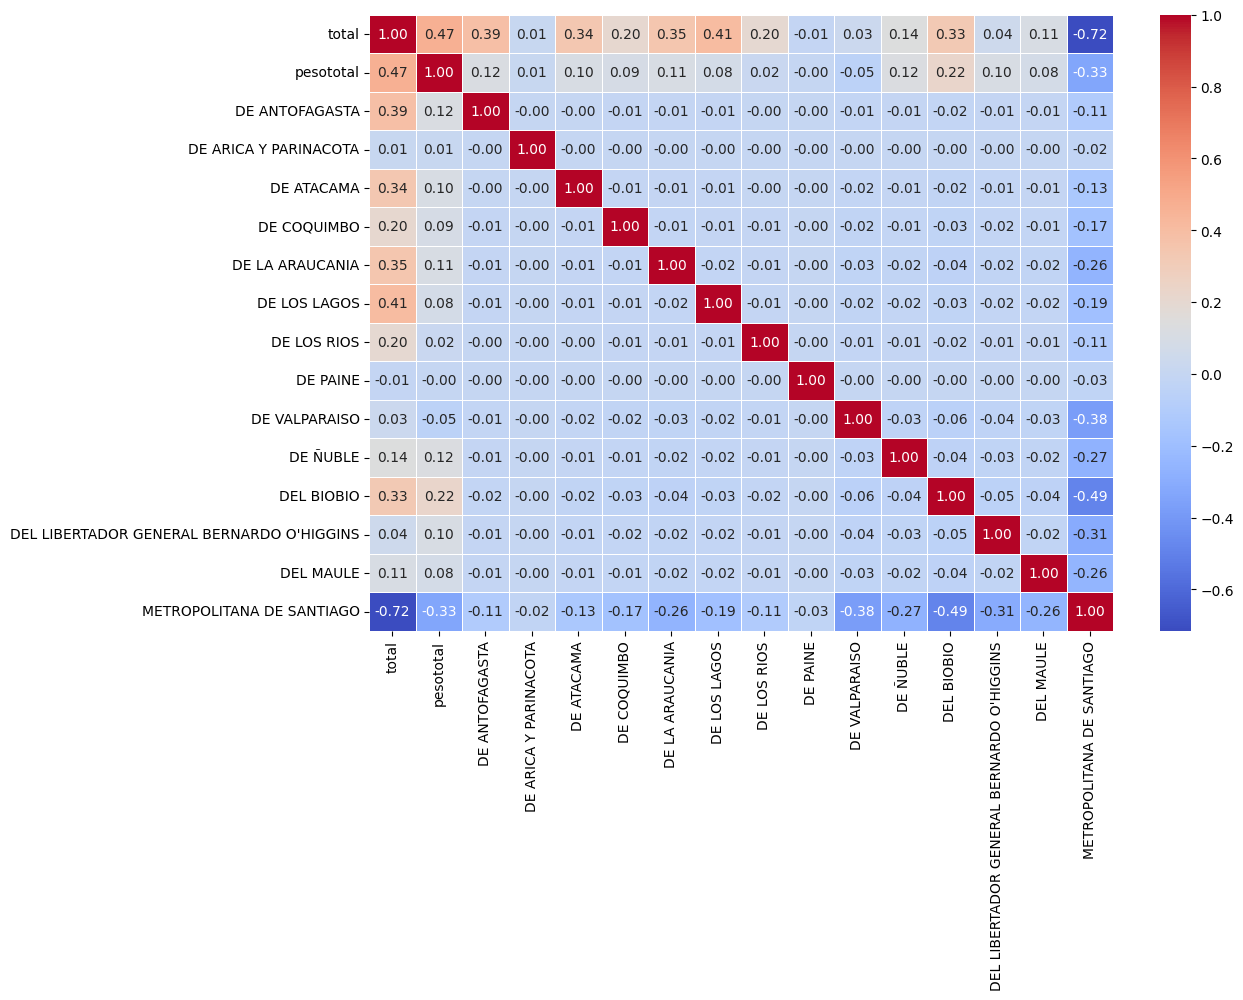

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df_pxk.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

In [36]:
df_pxk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7786
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   total                                      7787 non-null   float64
 1   pesototal                                  7787 non-null   float64
 2   DE ANTOFAGASTA                             7787 non-null   int64  
 3   DE ARICA Y PARINACOTA                      7787 non-null   int64  
 4   DE ATACAMA                                 7787 non-null   int64  
 5   DE COQUIMBO                                7787 non-null   int64  
 6   DE LA ARAUCANIA                            7787 non-null   int64  
 7   DE LOS LAGOS                               7787 non-null   int64  
 8   DE LOS RIOS                                7787 non-null   int64  
 9   DE PAINE                                   7787 non-null   int64  
 10  DE VALPARAISO                

In [37]:
X = df_pxk.drop(["total"], axis=1)
y = df_pxk["total"]

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   pesototal                                  7787 non-null   float64
 1   DE ANTOFAGASTA                             7787 non-null   int64  
 2   DE ARICA Y PARINACOTA                      7787 non-null   int64  
 3   DE ATACAMA                                 7787 non-null   int64  
 4   DE COQUIMBO                                7787 non-null   int64  
 5   DE LA ARAUCANIA                            7787 non-null   int64  
 6   DE LOS LAGOS                               7787 non-null   int64  
 7   DE LOS RIOS                                7787 non-null   int64  
 8   DE PAINE                                   7787 non-null   int64  
 9   DE VALPARAISO                              7787 non-null   int64  
 10  DE ÑUBLE                     

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
#RandomForest

model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
y_pred = model.predict(X_test)
mean_squared_error(y_test,y_pred)
msr = mean_squared_error(y_test,y_pred)
sqrt(msr)

65596.72652932612

In [42]:
r2_score(y_test,y_pred)

0.9183922684227549

In [43]:
dump(model, open('src/random_forest_regressor_default_42.pkl', 'wb'))

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 4302930531.363196
Coeficiente de determinación: 0.9183922684227549


In [22]:
dump(model, open('src/linear_model.pkl', 'wb'))